# Portuguese "Vinho Verde" Red & White Wine Analysis
Created by Christopher Wong: 8-4-22 

Last updated: 1-19-25
## Overview
This project focuses on analyzing Portuguese "Vinho Verde" red and white wine datasets, aiming to clean, explore, and model the data to predict wine quality.

---
## Project Goal
The main objectives of the project are:
- To predict wine quality ratings based on physicochemical attributes.
- To explore the relationship between key factors such as alcohol content, pH levels, and quality.
- To evaluate the effectiveness of the KNN algorithm for wine quality classification.
- To identify areas for improvement in wine quality prediction through advanced techniques.

---
## Key Steps

### 1. **Dataset preprocessing**
- Red and white wine datasets were obtained from the UCI Machine Learning Repository.
- The datasets were merged into a single dataset for unified analysis.
- Checked data types and ensured no missing values were present.

### 2. **Feature Engineering**
- Created a custom quality rating scale with three levels:
  - **Low (0)**: Quality levels 3–4
  - **Medium (1)**: Quality levels 5–6
  - **High (2)**: Quality levels 7–9
  
### 3. **Data Analysis**
- Visualized attribute correlations using a heatmap.
- Analyzed the frequency distribution of wine quality ratings.
- Visualized relationships between:
  - Wine quality and alcohol content using box plots.
  - Alcohol content, pH, and custom quality ratings using scatter plots.
- Generated insights into the interactions between attributes.

### 5. **Modeling**
- Split the dataset into training (80%) and testing (20%) sets.
- Used the **K-Nearest Neighbors (KNN)** algorithm to predict wine quality levels based on attributes like alcohol content, pH, and residual sugar.

### 6. **Model Evaluation**
- Evaluated model performance using the following metrics:
  - **Accuracy**: 75%
  - **Precision**, **Recall**, and **F1-Score** for each quality category.
- Analyzed the confusion matrix and classification report:
  - The model performed well in predicting the **Medium (1)** category.
  - Performance was weaker for the **High (2)** and **Low (0)** categories.


---



Joining and cleaning the data

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score

# Read the red wine quality dataset from the UCI Machine Learning Repository
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

# Read the white wine quality dataset from the UCI Machine Learning Repository
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

# Combine the red and white wine datasets using pd.concat
wData = pd.concat([red, white], ignore_index=True)

In [3]:
# Checking the datatypes of the attributes
wData.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
# Checking for missing values
wData.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can see, there are no missing values in the dataset

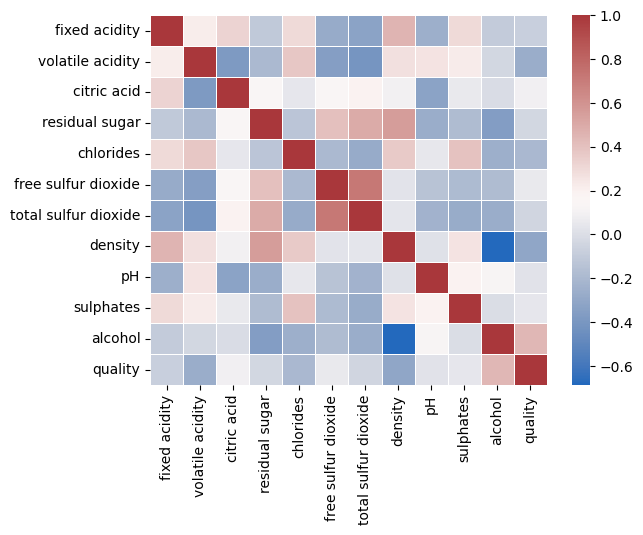

In [5]:
import seaborn as sn
import matplotlib.pyplot as plt
# Determining the correlation between the attributes, excluding Quality.
q4cor = wData.corr()

sn.heatmap(q4cor, 
           cmap = 'vlag', 
           linewidths = .5)
plt.show()

<Axes: xlabel='quality', ylabel='count'>

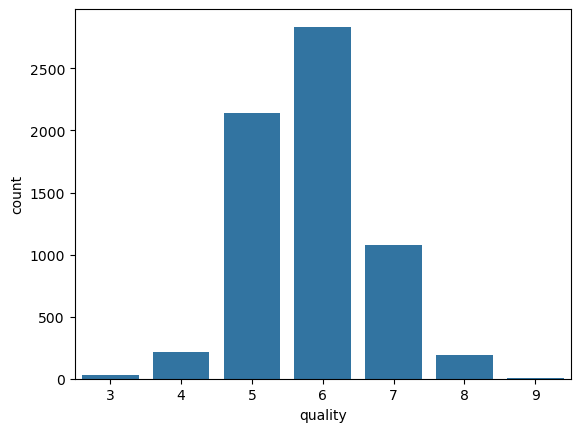

In [6]:
# Creating a plot to visualize the frequency distribution of wine quality using the Quality attribute
sn.countplot(x = "quality", 
             data = wData)

In [7]:
# Creating a custom quality rating scale by simplifying the ratings to three levels:
# High (2), Medium (1), and Low (0). 
# Assigning levels 3 and 4 to low (0); levels 5 and 6 to medium (1); and levels 7, 8, and 9 to high (2). 

def q6QA(quality):
    
    if quality <= 4:
        return "Low (0)"
    
    elif quality >= 5 and quality < 7:
        return "Medium (1)"
    
    else:
        return "High (2)"
    
    
# Apply the custom quality rating function to the dataset
wData['quality_rating'] = wData.apply(lambda row: q6QA(row.quality), axis = 1)
# Print a subset of the dataset to verify the new quality ratings
print(wData.iloc[ 20:39 , 11:13 ])

    quality quality_rating
20        6     Medium (1)
21        5     Medium (1)
22        5     Medium (1)
23        5     Medium (1)
24        6     Medium (1)
25        5     Medium (1)
26        5     Medium (1)
27        5     Medium (1)
28        5     Medium (1)
29        6     Medium (1)
30        5     Medium (1)
31        6     Medium (1)
32        5     Medium (1)
33        6     Medium (1)
34        5     Medium (1)
35        6     Medium (1)
36        6     Medium (1)
37        7       High (2)
38        4        Low (0)


In [8]:
# Normalizing the numeric attributes in the dataset
def norm(x):
  return ((x - min(x)) / (max(x) - min(x)))


What is the relationship between alcohol content and wine quality?

In [ ]:

# Create a box plot to visualize the relationship between alcohol content and quality
plt.figure(figsize=(10, 6))
box_plot = sn.boxplot(data=wData, x='quality', y='alcohol', palette='viridis')
box_plot.set_title('Alcohol Content by Wine Quality')
box_plot.set_xlabel('Wine Quality')
box_plot.set_ylabel('Alcohol Content')
plt.show()

How do alcohol content, pH level, and wine quality interact?

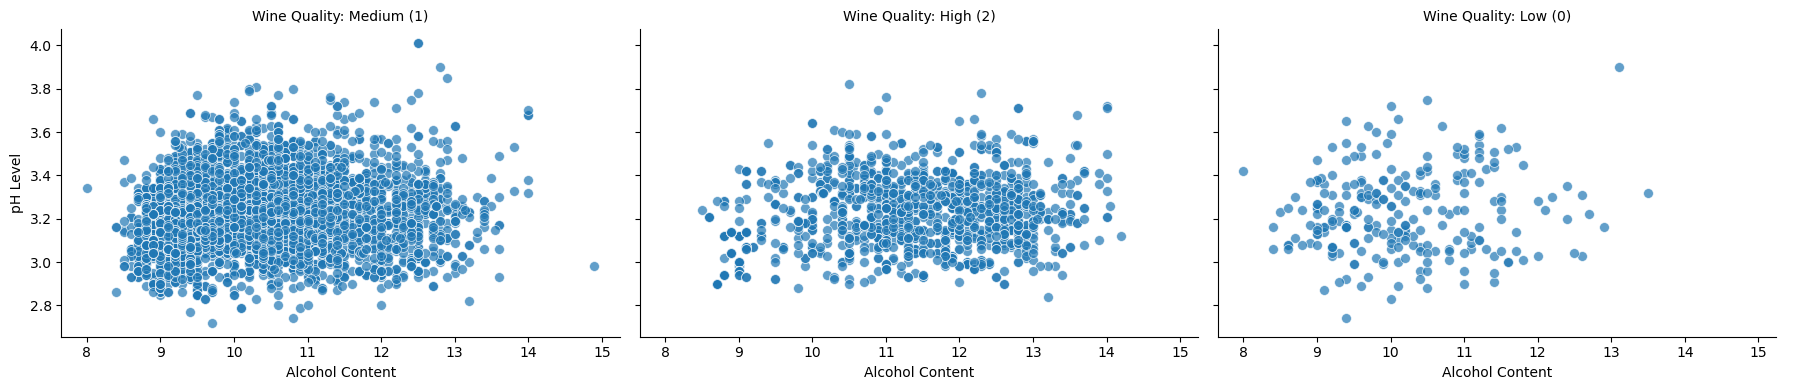

                  alcohol        pH
quality_rating                     
High (2)        11.433359  3.227651
Low (0)         10.184350  3.234797
Medium (1)      10.265275  3.215346


In [45]:
# Create a facet grid to visualize the relationship between alcohol, pH, and custom quality
facet = sn.FacetGrid(wData, col='quality_rating', col_wrap=3, height=4, aspect=1.5, palette='viridis')
facet.map(sn.scatterplot, 'alcohol', 'pH', alpha=0.7, s=50)
facet.add_legend()
facet.set_axis_labels('Alcohol Content', 'pH Level')
facet.set_titles('Wine Quality: {col_name}')
plt.show()

averages = wData.groupby('quality_rating').mean()[['alcohol', 'pH']]
print(averages)

In [46]:
# Dividing the dataset into training and test sets.

# Divide the dataset into features (X) and target (y)
X = wData.drop(['quality', 'quality_rating'], axis=1)
y = wData['quality_rating']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5197, 11)
X_test shape: (1300, 11)
y_train shape: (5197,)
y_test shape: (1300,)


In [47]:
# Using the KNN algorithm to predict the quality of wine using its attributes.
# Initialize the KNN classifier with a specified number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Predict the quality ratings for the test set
y_pred = knn.predict(X_test)

# Evaluate the classifier's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 82   1 169]
 [  2   3  44]
 [100   9 890]]

Classification Report:
              precision    recall  f1-score   support

    High (2)       0.45      0.33      0.38       252
     Low (0)       0.23      0.06      0.10        49
  Medium (1)       0.81      0.89      0.85       999

    accuracy                           0.75      1300
   macro avg       0.49      0.43      0.44      1300
weighted avg       0.72      0.75      0.73      1300



In [ ]:
# Evaluate the classifier's performance
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Confusion Matrix:")
print(conf_matrix)

# Display the accuracy, precision, and recall
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

# print the classification report for more detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[ 82   1 169]
 [  2   3  44]
 [100   9 890]]
Accuracy: 0.75
Precision: 0.72
Recall: 0.75

Classification Report:
              precision    recall  f1-score   support

    High (2)       0.45      0.33      0.38       252
     Low (0)       0.23      0.06      0.10        49
  Medium (1)       0.81      0.89      0.85       999

    accuracy                           0.75      1300
   macro avg       0.49      0.43      0.44      1300
weighted avg       0.72      0.75      0.73      1300



Explanation of the above output:

Accuracy: This is the ratio of correctly predicted instances to the total instances. It gives an overall measure of how well the model is performing. 

Precision: This is the ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive instances are actually positive. 

Recall: This is the ratio of correctly predicted positive observations to all the observations in the actual class. It indicates how many of the actual positive instances were correctly predicted by the model.